In [4]:
import cv2
from matplotlib import pyplot as plt
import os.path as osp
import os

In [5]:
real_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Training/1/KINECT/Light_02_Mid/real_01/color/crop/001.jpg"
mask_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/data/Training/1/KINECT/Light_02_Mid/attack_07_3d_mask/color/crop/001.jpg"

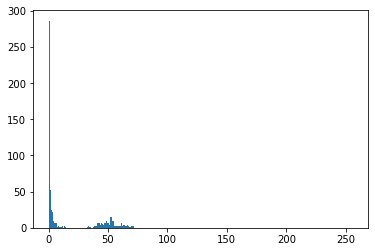

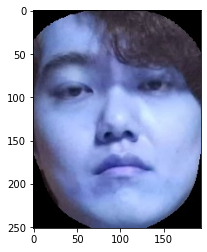

In [14]:
real_image = cv2.imread(real_path)
# mask_image = cv2.imread(mask_path)

real_out = real_image.copy()
height, width, _ = real_image.shape

real_b = real_image[0]
real_g = real_image[1]
real_r = real_image[2]

high = real_r.max()
low = real_r.min()

plt.figure()
plt.hist(real_b.ravel(), 256, [0,256])
plt.show()



In [5]:
    data_path = '/mnt/nas3/yrkim/liveness_lidar_project/GC_project/LDFAS'
    save_path = '/mnt/nas3/yrkim/liveness_lidar_project/GC_project/LDFAS/NPY_Files'

    kind = ["1. Indoor", "2. Outdoor", "3. Indoor_dark"]
    for idx, dir_name in enumerate(kind):
        dir_path = osp.join(data_path, dir_name)
        
        person_number = [int(i) for i in os.listdir(dir_path) if i.isdigit()]
        for i in person_number:
            if not osp.exists(osp.join(save_path, dir_name, 'real_cloud_data', str(i))) :
                os.makedirs(osp.join(save_path, dir_name, 'real_cloud_data', str(i)))
            if not osp.exists(osp.join(save_path, dir_name, 'mask_cloud_data', str(i))) :
                os.makedirs(osp.join(save_path, dir_name, 'mask_cloud_data', str(i)))
            if not osp.exists(osp.join(save_path, dir_name, 'replay_cloud_data', str(i))) :
                os.makedirs(osp.join(save_path, dir_name, 'replay_cloud_data', str(i)))
            if not osp.exists(osp.join(save_path, dir_name, 'paper_cloud_data', str(i))) :
                os.makedirs(osp.join(save_path, dir_name, 'paper_cloud_data', str(i)))
    
  

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/nas3/yrkim/liveness_lidar_project/GC_project/LDFAS/1.indoor'

In [10]:
import os
img_path = "/mnt/nas3/yrkim/liveness_lidar_project/GC_project/LDFAS/1. Indoor/1/bonafide"
files = os.listdir(img_path)
files = [j for j in files if (j.split('.')[-1]=='jpg') and (j.split('_')[0]=='rgb')]
depths = [j for j in files if (j.split('.')[-1]=='jpg') and (j.split('_')[0]=='depth')]

files
# depths

['rgb_10.jpg',
 'rgb_9.jpg',
 'rgb_6.jpg',
 'rgb_1.jpg',
 'rgb_5.jpg',
 'rgb_16.jpg',
 'rgb_2.jpg',
 'rgb_8.jpg',
 'rgb_19.jpg',
 'rgb_4.jpg',
 'rgb_13.jpg',
 'rgb_20.jpg',
 'rgb_14.jpg',
 'rgb_17.jpg',
 'rgb_11.jpg',
 'rgb_7.jpg',
 'rgb_15.jpg',
 'rgb_12.jpg',
 'rgb_18.jpg',
 'rgb_3.jpg']

In [25]:
import os
import os.path as osp
import random

import cv2
import numpy as np

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T 
import matplotlib.pyplot as plt

In [30]:
depth_data = cv2.imread("/mnt/nas3/yrkim/liveness_lidar_project/GC_project/LDFAS/1. Indoor/1/bonafide/depth_1.jpg")
depth_data = cv2.cvtColor(depth_data, cv2.COLOR_BGR2GRAY)
depth_data = cv2.resize(depth_data, (180,180), interpolation=cv2.INTER_CUBIC)   
depth_data

# img = cv2.imread('choco.jpg')
# plt.imshow(depth_data)

array([[187, 187, 187, ..., 191, 191, 191],
       [187, 187, 187, ..., 191, 191, 191],
       [187, 187, 187, ..., 191, 191, 191],
       ...,
       [193, 193, 194, ..., 201, 201, 201],
       [193, 193, 194, ..., 201, 201, 201],
       [193, 193, 194, ..., 201, 201, 201]], dtype=uint8)

In [23]:
train_dataset, test_dataset = load_dataset("rpm")
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False, num_workers=4, pin_memory=True)


720
240
